# Spatial Geometry

## About

For spatial geometry Ocean InfoHub guidance will be to use the OGC [GeoSPARQL](https://www.ogc.org/standards/geosparql)
vocabulary to express geometry using Well Known Text (WKT).  The schema.org spatial types and propeties are not well 
defined and difficult at times to reliably translate to geometries for use in more Open Geospatial Consortium (OGC)
environments.  

## Simple GeoSPARQL WKT

The following is a simple example of how to embed a WKT string via GeoSPARQL into a JSON-LD record.  
Well Know Text (WKT) is a OGC standard referenced at: https://www.ogc.org/standards/wkt-crs.
A more accessible description and set of examples can be found at WikiPedia:
[Well-known text representation of geometry](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry).


```{literalinclude} ./graphs/basic.json
:linenos:
:emphasize-lines: 4, 9-17
```

Line 4 declare the GeoSPARQL prefix for the vocabulary that we will leverage in this document.

Lines 9-17 are the GeoSPARQL node and property definitions.  In this case our type is a simple 
point geometry.  We then go on to declare the asWKT with a type and value.  The value 
is our actual WKT string for our geometry.   We can further 
declare the coordinate reference system (CRS) of the geometry using the crs property.

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



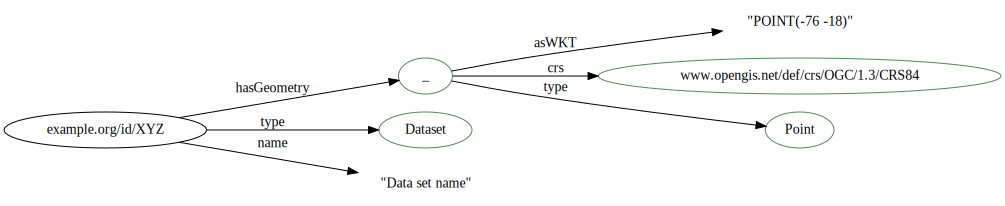

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/basic.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

### WKT Bounding Box

Note that WKT doesn't directly have a bounding box, in that case you 
would need to use a polygon.  The following is an example of a WKT string:

```
POLYGON((45.066730529474505 2.6430807905900235,47.395832091974505 2.6430807905900235,47.395832091974505 0.3588601145746598,45.066730529474505 0.3588601145746598,45.066730529474505 2.6430807905900235))
```

This following the pattern:

```
'POLYGON(x1 y1, x1 y2, x2 y2, x2 y1, x1 y1)'
```

## Classic Schema.org

Ocean InfoHub only recommends the use of Schema.org spatial geometries in 
the case where a provider wishes to be properly indexed by Google and to have the 
spatial information used by Google for maps.  Note, the lack of spatial information will
not prevent Google from indexing your resources.  

Schema.org spatial geometries are not well defined in comparison to OGC standards and 
recommendations.  Also, converting from Schema.org spatial to geometries in WKT or GeoJSON
can be problematic.  There are inconsistencies with
Schema.org guidance for textual geometry representation and that of Well 
Known Text (WKT).

That said, if you desire to leverage Schema.org geometries an example follows.  This 
is a simple example of the existing Schema.org pattern for a lat long value.   There is the 
pending [GeospatialGeometry](https://schema.org/GeospatialGeometry) which is a 
type Intangible (and not Place referenced by spatialCoverage).  This will be a 
subtype of [GeoShape](https://schema.org/GeoShape).   

Schema.org spatial relations are guided by [DE-9IM](https://en.wikipedia.org/wiki/DE-9IM).

```{literalinclude} ./graphs/sos.json
:linenos:
:emphasize-lines: 8-15
```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



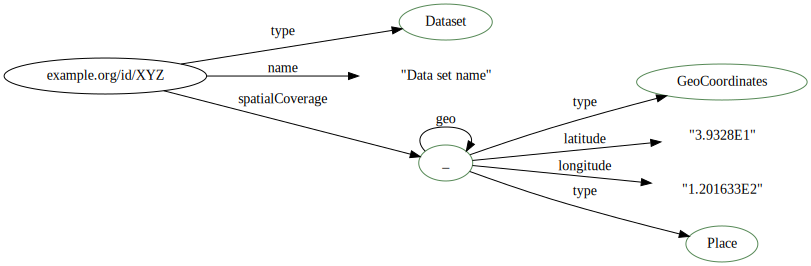

In [2]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/sos.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

## Option review, SOS Issue 105

There are several approaches to expressing spatial geometries in JSON-LD.
While Ocean InfoHub will recommend the use of GeoSPARQL, it is worth noting that there 
are alternative and solid cases for using them

One such case could be the case where your WKT geometry string are highly detailed and 
as a result quite long.  These might result in both very large JSON-LD documents that are hard to 
read and maintain.  It may also be that this imparts a performance penalty in your GeoSPARQL 
queries.  

It may be tha that you simplify your WKT geometry strings to a more basic form.  Then link out
to the detailed geometry in a separate document.   The simplified WKT (or Schema.org spatial)
make the documents smaller and easier to read and could help query performance.  The resource
can then point to a dereferencable URL for the detailed geometry.

ref Selfie:  When linking out to complex geometries we recommend following: https://docs.ogc.org/per/20-067.html


From the referenced SOS issue 105:

```{literalinclude} ./graphs/issue105.json
:linenos:
:emphasize-lines: 4-6, 12,18,28,39,46

```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



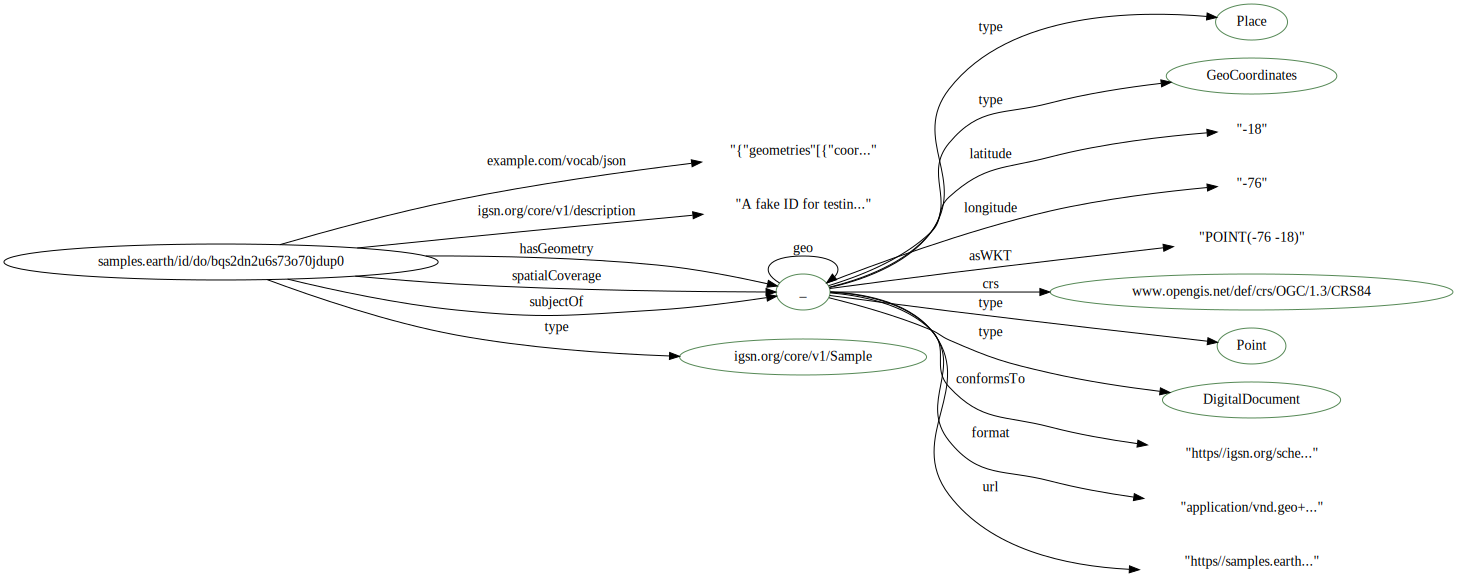

In [3]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/issue105.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

## References

* [GeoAPI at GitHub](https://github.com/opengeospatial/geoapi)
* [Science on Schema Issue 105](https://github.com/ESIPFed/science-on-schema.org/issues/105)
  * Leverages [subjectOf](https://schema.org/subjectOf) to connect to a Thing / CreativeWork
* [https://www.unsalb.org/](https://www.unsalb.org/)
* [https://www.un.org/geospatial/](https://www.un.org/geospatial/)
* [schema.org/spatial](https://schema.org/spatial)
* [schema.org/GeospatialGeometry](https://schema.org/GeospatialGeometry)
* SOS patern follows:
  * [spatialCoverage](https://schema.org/spatialCoverage) -> [Place](https://schema.org/Place) -> [geo](https://schema.org/geo) -> [GeoCoordinates](https://schema.org/GeoCoordinates) OR [GeoShape](https://schema.org/GeoShape)
* Some groups are using [GeoNode](https://geonode.org)
  * [schema.org issues](https://github.com/GeoNode/geonode/issues?q=schema.org)
* [ICAN & Schema.org](https://docs.google.com/document/d/1Ya7SNm0h6b04nIVMQ_M65LopxZ6_jojXzTxjfaX5Mxw/edit)
* [OGC SELFIE](https://www.ogc.org/projects/initiatives/selfie)
* [Think broad](https://docs.google.com/presentation/d/1HhuL73g1Bi_d86yT9VGfhvO0Xef9nKhJVwEeRYZ9k0c/edit#slide=id.ga724934615_3_0)
* Science on Schema [spatial for dataset guidance](https://github.com/ESIPFed/science-on-schema.org/blob/master/guides/Dataset.md#spatial-coverage)